In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "w_kmeans",10, 30, 0.01, "Adam",20])
print(len(runs_bp_smo))
#all_run_ids_smo = get_run_ids(runs_bp_smo)
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
#nochmal mit tail ausgeben und schauen, ob es einen großen Unterschied macht

5


In [3]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.beta"],[True, True, True, True, True, True],["bp_lmo_canceled", "margin", "w_kmeans", 30, 0.01, 20])
print(len(runs_bp_lmo))
#run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
run_ids_bp_lmo = get_run_ids(runs_bp_lmo.head(5))
run_ids_bp_lmo

5


0    678415ef1b4a45418ec37a34bcb4112d
1    e4f536870c5c4e0693890a205bfdd3db
2    778886372e68441f8f2326d5c37b753b
3    051bada99b3d41baa78461f71206320b
4    b3be61dcc1d64ba7b7c5338eb6f52833
Name: run_id, dtype: object

In [4]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "margin", "w_kmeans",1000, 30, 0.01, "Adam", 20])
print(len(runs_centroids))
#run_ids_centroids = get_run_ids(runs_centroids)
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

5


0    cc75f9e086614f13ba0e3848bac19e13
1    b097c695970a429ab2ceab5ccc7d3850
2    87e2c60557dc4d8a8f7734c695bb283d
3    22cd3fe1f47c4f91a2202dd14d53fb84
4    b2a73088820c4bda989183ab5dd8d58b
Name: run_id, dtype: object

In [5]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "w_kmeans",1000, 30, 0.01, 10, 20])
print(len(runs_bp_clusterwise))
#run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

5


0    e66f7f96068348759e18b58d686055dc
1    024b03caca844972804548cca2842961
2    0e6bb3de3eb34475848840a6453ef5f8
3    ff69d65bf3dd400cb853173b7b627c62
4    312544bfa2d642488d27f12530985e1f
Name: run_id, dtype: object

In [6]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "margin", "w_kmeans",1000, 0.01, 30, 10, 20])
print(len(runs_boundary))
#run_ids_boundary = get_run_ids(runs_boundary)
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

5


0    adec891281564b35af6b0e77566a40a2
1    249dc24345c64f48ba9fb7acce67dc80
2    fcf4e4b446d945c6b0df9d9db45fb5fa
3    c2d4c2b564014ff4b2f407218ce13823
4    832e95e0e5c24c95bdee249c23579083
Name: run_id, dtype: object

In [7]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
#run_ids_random = get_run_ids(runs_random)
run_ids_random = get_run_ids(runs_random.head(5))
run_ids_random

10


0    7f1e5628b6334cc3a9de37e61104358d
1    421ff61556e5461f97a973fa111c3c63
2    ae5681ec87874fbda5bd998ad8c13970
3    1437f6a0f73a4039ad88d8c63b54f84c
4    d2a0054c9b594e3cb78e9adb27ac6157
Name: run_id, dtype: object

In [8]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 20, "margin"])
print(len(runs_random_uncertainty))
#run_ids_random = get_run_ids(runs_random)
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

5


0    71303339bd34442b91a30eb4512fdd7a
1    cf276eb20075433f9597b565bc27e561
2    bb63474b616c4237b03f117358b8238c
3    0c8b968cc2a744ee88067602a3a44dc2
4    2600107a4da643608142c083639f9010
Name: run_id, dtype: object

In [9]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
#samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)
samples_labeled_random_uncertain, avg_accs_random_uncertain = get_labeledSamples_avgAcc(run_ids_random_uncertainty, tracking)

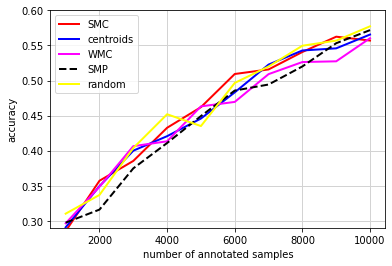

In [10]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
#plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

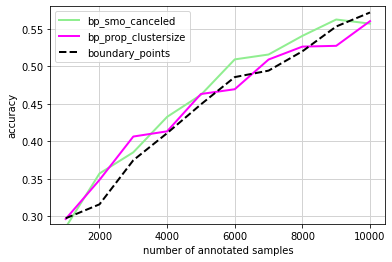

In [11]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [12]:
avg_accs_centroids

array([0.2907 , 0.34936, 0.39998, 0.42064, 0.44578, 0.48312, 0.5227 ,
       0.5428 , 0.54586, 0.56552])

In [13]:
avg_accs_boundary

array([0.29734, 0.31596, 0.37476, 0.4109 , 0.44932, 0.48566, 0.49428,
       0.52006, 0.55316, 0.57184])

In [14]:
avg_accs_bp_smo

array([0.2852 , 0.35708, 0.38534, 0.43262, 0.462  , 0.50928, 0.51578,
       0.54066, 0.56246, 0.55696])

In [15]:
#avg_accs_bp_lmo

In [16]:
avg_accs_clusterwise

array([0.29642, 0.34852, 0.40638, 0.41334, 0.46312, 0.46948, 0.50908,
       0.52632, 0.52736, 0.5603 ])

In [17]:
avg_accs_random

array([0.31016, 0.33688, 0.40374, 0.45186, 0.43506, 0.49656, 0.51994,
       0.54958, 0.55688, 0.57726])

In [18]:
avg_accs_random_uncertain

array([0.3038 , 0.35358, 0.39718, 0.41198, 0.46542, 0.47712, 0.50866,
       0.53472, 0.554  , 0.56656])